# **1. Perkenalan Dataset**


#### 📝 Deskripsi Dataset Resume - Neuralframe AI

Link: https://www.kaggle.com/datasets/saugataroyarghya/resume-dataset/data

Dataset ini dikurasi dan diproses oleh **Neuralframe AI** sebagai sumber komprehensif untuk berbagai aplikasi seperti:
- Resume parsing (membaca resume secara otomatis)
- Profil kandidat
- Pencocokan kandidat dengan lowongan kerja (job matching)

#### Sumber Data
Data dikumpulkan dari:
- Platform open-source
- Sumber internal milik Neuralframe AI

#### Penggunaan Dataset
Dataset ini pertama kali digunakan dalam kompetisi **Datathon Bitfest 2025**, sebagai bahan latihan praktis untuk mengembangkan algoritma resume parser dan sistem evaluasi kandidat.

#### Konten Dataset
Dataset ini memuat informasi resume dalam format terstruktur, mencakup:
- Tujuan karier
- Keterampilan
- Pendidikan
- Pengalaman kerja
- Sertifikasi
- Kegiatan ekstrakurikuler
- Bahasa
- Kecocokan dengan posisi kerja

| Column Name                            | Description                                                             | Example / Format          | Data Type     |
|----------------------------------------|-------------------------------------------------------------------------|----------------------------|----------------|
| `address`                              | Lokasi tempat tinggal kandidat                                          | "New York, NY"             | string         |
| `career_objective`                     | Tujuan karier kandidat dalam bentuk paragraf                           | Paragraph text             | string         |
| `skills`                               | Daftar keterampilan umum kandidat                                       | "Python, SQL, ML"          | list/string    |
| `educational_institution_name`         | Nama institusi pendidikan                                               | "MIT"                      | string         |
| `degree_names`                         | Gelar yang diperoleh                                                    | "B.Sc., M.Sc."             | list/string    |
| `passing_years`                        | Tahun kelulusan                                                         | 2020                       | list/integer   |
| `educational_results`                 | Nilai akademik (IPK atau persentase)                                    | 3.5 / 85%                  | list/float     |
| `result_types`                         | Jenis penilaian akademik                                                | "GPA", "%"                 | list/string    |
| `major_field_of_studies`              | Jurusan atau bidang studi                                               | "Computer Science"         | list/string    |
| `professional_company_names`          | Nama perusahaan tempat bekerja                                          | "Google"                   | list/string    |
| `company_urls`                         | Tautan resmi perusahaan                                                 | "https://google.com"       | list/string    |
| `start_dates`                          | Tanggal mulai bekerja                                                   | "Jan 2021"                 | list/date      |
| `end_dates`                            | Tanggal selesai bekerja                                                 | "Dec 2022"                 | list/date      |
| `related_skils_in_job`                | Keterampilan yang digunakan dalam pekerjaan                             | "Python, Docker"           | list/string    |
| `positions`                            | Jabatan dalam pekerjaan                                                 | "Software Engineer"        | list/string    |
| `locations`                            | Lokasi pekerjaan                                                        | "San Francisco, CA"        | list/string    |
| `responsibilities`                    | Tanggung jawab pekerjaan                                                | Paragraph text             | list/string    |
| `extra_curricular_activity_types`     | Jenis kegiatan non-akademik                                             | "Volunteer, Hackathon"     | list/string    |
| `extra_curricular_organization_names` | Nama organisasi tempat berkegiatan                                      | "IEEE"                     | list/string    |
| `extra_curricular_organization_links` | Tautan organisasi                                                       | URL                        | list/string    |
| `role_positions`                       | Jabatan dalam organisasi ekstrakurikuler                                | "Chairperson"              | list/string    |
| `languages`                            | Bahasa yang dikuasai                                                    | "English, French"          | list/string    |
| `proficiency_levels`                  | Tingkat kemahiran bahasa                                                | "Fluent, Basic"            | list/string    |
| `certification_providers`            | Nama penyedia sertifikasi                                               | "Coursera"                 | list/string    |
| `certification_skills`               | Keterampilan dari sertifikasi                                           | "Deep Learning"            | list/string    |
| `online_links`                         | Tautan sertifikasi atau profil online                                   | URL                        | list/string    |
| `issue_dates`                          | Tanggal penerbitan sertifikat                                           | "2023-01"                  | list/date      |
| `expiry_dates`                         | Tanggal kadaluarsa sertifikat                                           | "2026-01" / null           | list/date      |
| `job_position_name`                   | Nama posisi pekerjaan yang dituju                                       | "Data Scientist"           | string         |
| `educationaL_requirements`           | Persyaratan pendidikan pada lowongan                                    | "Bachelor's in CS"         | string         |
| `experiencere_requirement`           | Persyaratan pengalaman kerja                                            | "3+ years"                 | string         |
| `age_requirement`                     | Persyaratan usia                                                        | "25-35" / null             | string         |
| `responsibilities.1`                 | Deskripsi tanggung jawab dari lowongan kerja                            | Paragraph text             | string         |
| `skills_required`                     | Keterampilan yang dibutuhkan pada lowongan kerja                        | "SQL, Python"              | string         |
| `matched_score`                       | Skor kecocokan antara resume dan lowongan                               | 0.85                       | float          |

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import ast  # for parsing array-string
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# **3. Memuat Dataset**

In [2]:
file_path = '../raw_data/resume_data.csv'
df = pd.read_csv(file_path)

# **4. Exploratory Data Analysis (EDA)**

### Assesing dataset shape

In [3]:
df.shape

(9544, 35)

**Insights**:
* Data memiliki 9544 baris dan 35 kolom.

### Assesing data

In [5]:
df.head(1).T

,0
address,NaN
career_objective,Big data analytics working and database wareho...
skills,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr..."
educational_institution_name,['The Amity School of Engineering & Technology...
degree_names,['B.Tech']
passing_years,['2019']
educational_results,['N/A']
result_types,[None]
major_field_of_studies,['Electronics']
professional_company_names,['Coca-COla']


**Insights**:
* **Kekosongan Data (Missing Values)**

   * Banyak kolom memiliki nilai kosong (`NaN`), seperti: `address`, `extra_curricular_activity_types`, `languages`, `certification_providers`, `online_links`, dan `skills_required`. Ini menunjukkan bahwa:

     * Tidak semua kandidat menyertakan informasi detail seperti kegiatan ekstrakurikuler, sertifikasi, atau tautan online.
     * Fitur-fitur tersebut mungkin opsional atau kurang umum diisi.

* **Tipe Data Campuran**

   * Beberapa kolom menggunakan struktur **list di dalam string**:

     * Contoh: `skills`, `educational_institution_name`, `degree_names`, `professional_company_names` → semuanya berupa list meskipun hanya berisi satu elemen.
     * Ini menyiratkan bahwa dataset mendukung multi-entri untuk satu kandidat.
   * Beberapa list bersarang, seperti `related_skils_in_job`, yang merupakan list dalam list: `[['Big Data']]`.

* **Format Tanggal Tidak Konsisten**

   * `start_dates` dan `end_dates` berisi string tanggal seperti `'Nov 2019'` dan `'Till Date'`, yang berarti perlu preprocessing agar bisa diproses sebagai datetime.
   * `'Till Date'` perlu dinormalisasi (misalnya menjadi `null` atau tanggal sekarang).

* **Skor Kecocokan (Matching Score)**

   * Kolom `matched_score = 0.85` menunjukkan ada semacam sistem evaluasi otomatis untuk mengukur seberapa cocok kandidat terhadap posisi `Senior Software Engineer`. 

### Check dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   address                              784 non-null    object 
 1   career_objective                     4740 non-null   object 
 2   skills                               9488 non-null   object 
 3   educational_institution_name         9460 non-null   object 
 4   degree_names                         9460 non-null   object 
 5   passing_years                        9460 non-null   object 
 6   educational_results                  9460 non-null   object 
 7   result_types                         9460 non-null   object 
 8   major_field_of_studies               9460 non-null   object 
 9   professional_company_names           9460 non-null   object 
 10  company_urls                         9460 non-null   object 
 11  start_dates                   

### Assesing null values

In [6]:
df.isna().sum()

address                                8760
career_objective                       4804
skills                                   56
educational_institution_name             84
degree_names                             84
passing_years                            84
educational_results                      84
result_types                             84
major_field_of_studies                   84
professional_company_names               84
company_urls                             84
start_dates                              84
end_dates                                84
related_skils_in_job                     84
positions                                84
locations                                84
responsibilities                          0
extra_curricular_activity_types        6118
extra_curricular_organization_names    6118
extra_curricular_organization_links    6118
role_positions                         6118
languages                              8844
proficiency_levels              

**Insights**:
* Terdapat banyak missing values dalam beberapa kolom dan tipe data didominasi tipe data object.

### Assesing duplicates and describe data

In [7]:
df.duplicated().sum()

np.int64(0)

**Insight**:
* Tidak terdapat duplikat data dalam dataset ini.

In [8]:
df.describe(include='all')

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,online_links,issue_dates,expiry_dates,﻿job_position_name,educationaL_requirements,experiencere_requirement,age_requirement,responsibilities.1,skills_required,matched_score
count,784,4740,9488,9460,9460,9460,9460,9460,9460,9460,...,2008,2008,2008,9544,9544,8180,5457,9544,7843,9544.000000
unique,28,171,340,328,180,149,78,30,210,199,...,7,30,11,28,20,17,14,28,23,NaN
top,"Sunnyvale, CA",Big data analytics working and database wareho...,[],"['Illinois Institute of Technology', 'National...",['B.Tech'],['2019'],['N/A'],['N/A'],['N/A'],"['Company Name', 'Company Name', 'Company Name']",...,[None],['N/A'],[None],Project Coordinator (Civil),Bachelor/Honors,At least 5 years,Age 25 to 40 years,Project Design\nData Analysis\nACCORD/Alliance...,AutoCAD\nCommunication and negotiation skills\...,NaN
freq,28,28,56,112,1764,1428,3612,3416,616,1204,...,1196,644,1028,342,2044,1024,1023,342,342,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660831
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.167040
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.793333


**Insights:**

- Dataset terdiri dari 9544 baris data.
- Rata-rata skor kecocokan (`matched_score`) adalah sekitar 0.68, dengan nilai minimum 0 dan maksimum 0.97, menunjukkan variasi tingkat kecocokan kandidat terhadap posisi yang dituju.
- Beberapa kolom memiliki proporsi missing value yang tinggi, seperti `address`, `languages`, `certification_providers`, dan `online_links`, sehingga perlu perhatian khusus dalam penanganan data hilang.
- Banyak kolom bertipe object dan berisi data list dalam bentuk string, sehingga perlu parsing sebelum analisis lebih lanjut.
- Kolom `skills`, `positions`, dan `major_field_of_studies` memiliki variasi nilai yang tinggi, menandakan keragaman pengalaman dan keahlian kandidat.

### Visualization

#### Visualize skills data

In [9]:
skill_series = df.skills

In [10]:
# convert string to be a list
parsed_skills = skill_series.dropna().apply(ast.literal_eval)

# flatten and count frquency
all_skills = [skill.strip().lower() for sublist in parsed_skills for skill in sublist if isinstance(skill, str)]
skill_counts = Counter(all_skills) # count skills

# top 5 skills
top_5 = skill_counts.most_common(5)

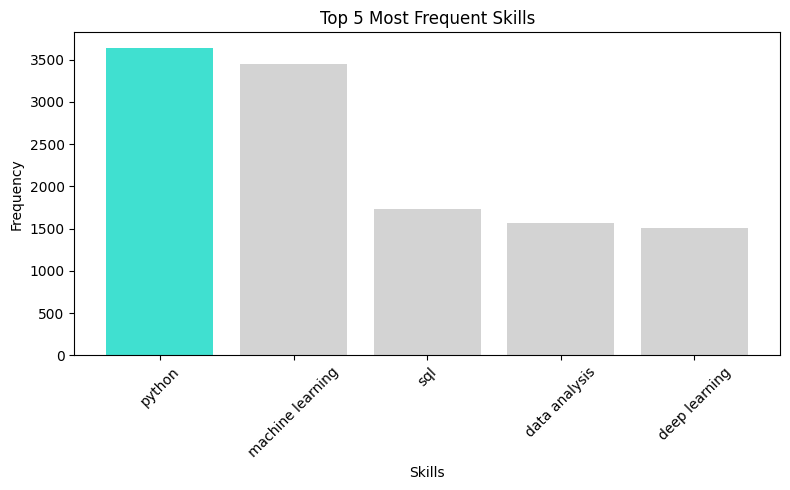

In [11]:
skills, counts = zip(*top_5)
colors = ['#40E0D0' if i == 0 else 'lightgray' for i in range(len(skills))]  # tosca hex = #40E0D0
plt.figure(figsize=(8, 5))
bars = plt.bar(skills, counts, color=colors)
plt.title("Top 5 Most Frequent Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

* Skills terbanyak yang dimiliki pelamar pekerjaan adalah python, diikuti dengan skills machine learning, sql, data analysis, dan deep learning.

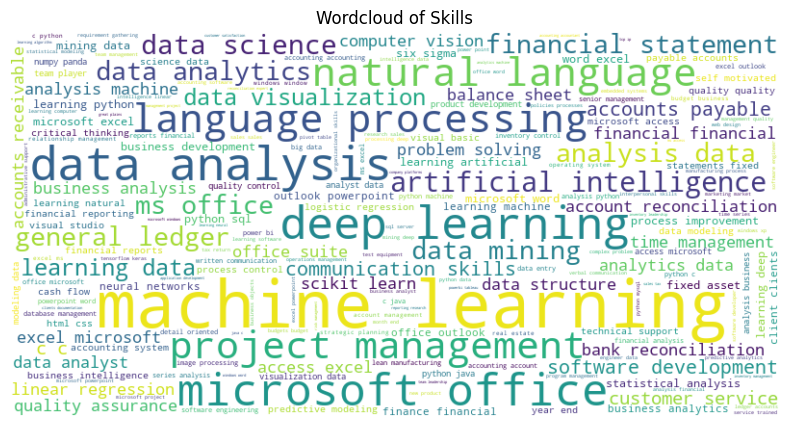

In [12]:
# combine all skill lists into a single text blob
text_blob = ' '.join(all_skills)

# create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Skills")
plt.show()

**Insight**:

* Wordcloud memberikan insight frekuensi semua skill yang tercatat, semakin besar ukuran suatu kata maka makin banyak frekuensinya.

#### Visualize position data

In [13]:
position_series = df.positions

In [14]:
# convert string to be a list
parsed_positions = position_series.dropna().apply(ast.literal_eval)

# flatten and count frquency
all_positions = [position.strip().lower() for sublist in parsed_positions for position in sublist if isinstance(position, str)]
position_counts = Counter(all_positions) # count position

# top 5 position
top_5_position = position_counts.most_common(5)

In [15]:
top_5_position

[('accountant', 1148),
 ('intern', 560),
 ('senior accountant', 392),
 ('n/a', 364),
 ('staff accountant', 336)]

**Insights:**

* Data resume ini didominasi oleh posisi `Accountant` sebagai posisi terbanyak.
* Posisi `Intern` menempati urutan kedua dalam jumlah kemunculan.
* Pada daftar 5 posisi teratas, masih terdapat sejumlah nilai `NaN` yang cukup signifikan.

**Kesimpulan:**

Karena data belum sepenuhnya bersih, visualisasi belum dilakukan dan hanya disajikan dalam bentuk hitungan (counting). Mengacu pada course "Belajar Analisis Data", visualisasi sebaiknya dilakukan setelah proses pembersihan data agar hasilnya benar-benar merepresentasikan kondisi sebenarnya dan tidak menyesatkan.

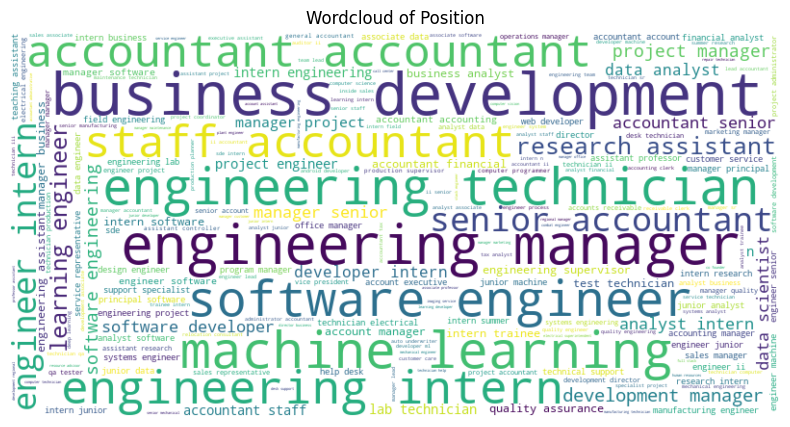

In [16]:
# combine all position lists into a single text blob
text_blob = ' '.join(all_positions)

# create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of Position")
plt.show()

**Insight**:

* Wordcloud memberikan insight frekuensi semua skill yang tercatat, semakin besar ukuran suatu kata maka makin banyak frekuensinya.

# **5. Data Preprocessing**

Saya akan mengembangkan proyek **Resume Screening Classifier for Data Scientist Applications**, yaitu model klasifikasi untuk menilai kelayakan kandidat berdasarkan isi resume mereka. Berikut adalah pendekatan dan justifikasi awalnya:

* **Tujuan utama** dari proyek ini bukan menilai seluruh aspek dari resume, tetapi **mengklasifikasikan kelayakan berdasarkan kompetensi utama** yang ditulis kandidat, seperti:

  * `career_objective`
  * `skills`
  * `major_field_of_studies`
  * `positions`
  * `responsibilities`

* Oleh karena itu, **kolom lain yang bersifat administratif atau opsional**, seperti `address`, `languages`, `certification_links`, dan `extra_curriculars`, **tidak akan digunakan secara langsung**.

#### Menggabungkan Informasi dalam Satu Representasi

* Semua kolom relevan yang merepresentasikan isi resume akan **digabungkan (merged) menjadi satu kolom teks gabungan** untuk memudahkan embedding dan klasifikasi berbasis konteks.
* Ini memungkinkan **mengabaikan missing values di beberapa kolom**, karena yang terpenting adalah menghasilkan **representasi teks gabungan yang cukup bermakna**.

#### Menggunakan Sentence Transformers

* Saya akan menggunakan **pretrained model dari Sentence Transformers** (`all-MiniLM-L6-v2`), yang:

  * Fokus pada **makna dan konteks kalimat**, bukan sekadar token atau struktur kalimat.
  * **Robust terhadap variasi gaya penulisan, kesalahan ketik, atau kekurangan tanda baca.**
  * Mampu memahami relasi antar kalimat untuk membentuk vektor embedding yang merepresentasikan keseluruhan profil kandidat.

#### Kesimpulan

Dengan menggabungkan kolom-kolom relevan ke dalam satu representasi teks yang diproses melalui Sentence Transformers, maka dapat:

* Mengabaikan sebagian besar missing values dengan aman.
* Fokus pada konteks yang benar-benar mewakili kompetensi kandidat.
* Membangun **model klasifikasi resume yang ringan, cepat, dan akurat**, tanpa terjebak pada kompleksitas data yang tidak informatif.

### 🔄 Resume Screening Flow

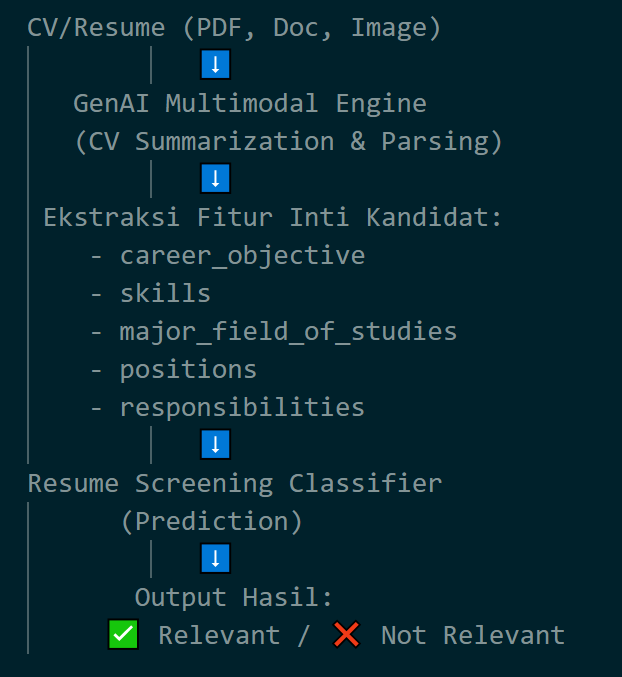

### Feature Selection

In [17]:
selected_fields = [
  'career_objective',
  'skills',
  'major_field_of_studies',
  'positions',
  'responsibilities'
]

df_selected = df[selected_fields].copy()

**Insights:**

Pada tahap ini, dilakukan **feature selection** dengan memilih hanya beberapa kolom utama dari dataset, yaitu: `career_objective`, `skills`, `major_field_of_studies`, `positions`, dan `responsibilities`. Alasan pemilihan fitur-fitur ini adalah:

- Kolom-kolom tersebut secara langsung merepresentasikan **kompetensi, pengalaman, dan tujuan karier** kandidat, yang sangat relevan untuk proses screening resume.
- Kolom lain seperti `address`, `languages`, atau `certification_links` bersifat administratif atau opsional, sehingga **kurang berpengaruh terhadap penilaian kelayakan kandidat** untuk posisi Data Scientist.
- Dengan membatasi fitur pada kolom-kolom inti, proses analisis dan pemodelan menjadi **lebih fokus, efisien, dan mudah diinterpretasikan**.

Setelah fitur dipilih, dilakukan proses **copy** ke dataframe baru (`df_selected`) agar data mentah tetap terjaga dan proses pembersihan/transformasi hanya dilakukan pada salinan data yang relevan.

In [18]:
for col in df_selected.columns:
  print(f'\nUnique values in {col} column: {df_selected[col].unique()}\n')


Unique values in career_objective column: ['Big data analytics working and database warehouse manager with robust experience in handling all kinds of data. I have also used multiple cloud infrastructure services and am well acquainted with them. Currently in search of role that offers more of development.'
 'Fresher looking to join as a data analyst and junior data scientist. Experienced in creating meaningful data dashboards and evaluation models.'
 nan
 'To obtain a position in a fast-paced business office environment, demanding a strong organizational, technical, and interpersonal position utilizing my skills and attributes.'
 'Professional accountant with an outstanding work ethic and integrity seeking to make a valuable contribution utilizing strong analytical, organizational, communication, and computer skills.'
 'To secure an IT specialist, desktop support, network administration, database administrator, technical support specialist or related position with a growing organizati

**Insights**:

- **Nilai seperti `'N/A'` sering muncul dalam bentuk list, bukan hanya string kosong atau NaN.** Ini menyebabkan nilai tersebut tidak terdeteksi sebagai missing value (`NaN`) oleh fungsi standar pandas, sehingga perlu penanganan khusus saat cleaning.
- **Duplikasi Nilai Dummy:** Contoh `"['Electrical Engineering Specialized in Computer Science', 'N/A', 'N/A']"` menunjukkan bahwa selain data utama, terdapat pengulangan `'N/A'` dalam satu entri list. Hal ini dapat menyebabkan bias saat analisis frekuensi atau agregasi data.
- **Kolom Terdampak:** Pola ini ditemukan pada minimal dua kolom utama, yaitu `major_field_of_studies` atau kolom lain yang menyimpan data list dalam bentuk string.
- **Perlu parsing dan filtering khusus** untuk mengubah list-string menjadi list Python asli, lalu menghapus elemen dummy seperti `'N/A'`, `'None'`, atau string kosong.

### Handling null values

In [19]:
df_selected.isna().sum()

career_objective          4804
skills                      56
major_field_of_studies      84
positions                   84
responsibilities             0
dtype: int64

**Insights:**

* Terdapat banyak nilai missing **(NaN)** di berbagai kolom.
* Namun, karena proses selanjutnya akan **menggabungkan beberapa kolom penting menjadi satu representasi teks**, fokus utama adalah mengevaluasi apakah missing values tersebut berada di kolom yang relevan.
* Oleh karena itu, langkah awal eksplorasi akan **difokuskan pada analisis kolom** yang akan digunakan, untuk menentukan apakah baris dengan missing di kolom tersebut perlu di-drop atau bisa tetap digunakan.

#### Handling null values in skills

In [20]:
df_selected[df_selected.skills.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
107,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Relationship Building\nHR Collaboration\nPolic...
228,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Design Creation\nCAD Drawings\nDesign Optimiza...
353,NaN,NaN,"['Computer Science', 'Computer Science']","['Professor Emerytus', 'Professor', 'Director ...",Open-Source Technologies\nCI/CD Culture & Tool...
405,To utilize my customer relations and managemen...,NaN,['Accounting'],"['Accountant', 'Director of Finance & Accounts...",Database Design & Development\nSQL Query Optim...
428,To utilize my customer relations and managemen...,NaN,['Accounting'],"['Accountant', 'Director of Finance & Accounts...",Supervision\nMonitoring\nConstruction\nEstimat...


**Insight**:

* Pada beberapa kolom terlihat terdapat data yang sama dalam jumlah yang banyak.

In [21]:
df_selected[df_selected.skills.isna()].groupby(by='positions').size()

positions
['Accountant', 'Director of Finance & Accounts', 'Training & Operations Consultant', 'Franchisee', 'General Manager', 'Patient Service Representative']                                                                               28
['Professor Emerytus', 'Professor', 'Director of Graduate Studies', 'Associate Professor', 'Associate Professor', 'Assistant Professor', 'Visiting Assistant Professor', 'Assistant Professor', 'Teaching and Research Assistant']    28
dtype: int64

**Insight**:

* Beberapa kolom seperti `positions`, `major_field_of_studies` sering kali memuat **informasi yang sama atau bahkan duplikat**.
* Setelah ditinjau, **perbedaan utama hanya terletak pada isi responsibilities**, sedangkan positions sudah cukup merepresentasikan peran kandidat secara langsung.
* Oleh karena itu, untuk menyederhanakan input model dan menghindari redudansi, saya memilih menggunakan **positions dan beberapa kolom lain sebagai perwakilan unique values** melalui metode `group by`.

In [22]:
# select subset data with NaN skills 
df_skills_nan = df_selected[df_selected.skills.isna()].copy()

# fill NaN values with empty strings
df_skills_nan['career_objective'] = df_skills_nan['career_objective'].fillna("")
df_skills_nan['skills'] = df_skills_nan['skills'].fillna("")

# determine the columns to group by which represent the unique combinations of career objective, skills, major field of studies, and positions
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# Groupby and combine responsibilities
df_grouped = df_skills_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [23]:
df_selected = df_selected.dropna(subset=['skills'])

In [24]:
df_cleaned_skills = pd.concat([df_selected, df_grouped], ignore_index=True)

**Insights:**

* Beberapa entri pada kolom skills memiliki nilai `NaN`, terutama pada data yang memiliki posisi serupa.
* Untuk mengisi kekosongan tersebut tanpa menebak secara sembarangan, saya melakukan **penggabungan data berdasarkan hasil group by**, lalu mengambil **unique values sebagai pengganti**.
* Saya juga melakukan **fillna pada beberapa kolom** agar dapat digunakan sebagai `group_cols`.
* Pendekatan ini membantu **mengurangi missing values** secara kontekstual, sekaligus **menghindari duplikasi dan mempertahankan konsistensi antar entri dengan posisi yang sama**.

In [25]:
df_cleaned_skills.isna().sum()

career_objective          4776
skills                       0
major_field_of_studies      84
positions                   84
responsibilities             0
dtype: int64

#### Handling null values in positions

In [26]:
df_cleaned_skills[df_cleaned_skills.positions.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
186,Fresher Computer vision and Machine Learning E...,"['Machine learning', 'Deep learning', 'Compute...",['Computer Science'],NaN,"Full Stack Development\nFront-end: ReactJS, Ne..."
246,I am a Master of Data Science graduate looking...,"['Software Development', 'Client Management', ...","['Computers', 'Data Science']",NaN,Application Development\nObject-Oriented Desig...
273,I am a Master of Data Science graduate looking...,"['Software Development', 'Client Management', ...","['Computers', 'Data Science']",NaN,Machinery Maintenance\nTroubleshooting\nReport...
336,Fresher Computer vision and Machine Learning E...,"['Machine learning', 'Deep learning', 'Compute...",['Computer Science'],NaN,Mushak Forms Maintenance\nVAT Software & MS Of...
396,NaN,"['Skill 1', 'Skill 3', 'Skill 5', 'Skill 2', '...",['Name of Major'],NaN,Mushak Forms Maintenance\nVAT Software & MS Of...


**Insights:**

* Ditemukan adanya **baris dengan nilai dummy di hampir semua kolom**, yang tidak merepresentasikan data asli kandidat.
* Nilai-nilai tersebut tampak seperti **placeholder atau hasil input uji coba, bukan informasi aktual, sehingga berpotensi mengganggu analisis atau model jika dianggap sebagai data unik**.
* Berdasarkan isi kolom responsibilities, baris dummy ini **teridentifikasi berasal dari index ke-336**.
* Oleh karena itu, untuk menjaga kualitas data dan menghindari bias, baris ini sebaiknya **diabaikan atau dihapus** dari dataset sebelum proses lebih lanjut.
* Sehingga **hasil merge data menjadi lebih kontekstual dibanding mengisi null values saja**.

In [27]:
df_positions_nan = df_cleaned_skills[df_cleaned_skills.positions.isna()].copy()

In [28]:
df_positions_nan.groupby('career_objective').size()

career_objective
Fresher Computer vision and Machine Learning Engineer looking for a job that is both challenging and fun in terms of problem-solving. Also an expert in maintaining and managing Tableau and Power BI dashboards to address business.                                                                                                                                                                                                                                                  28
I am a Master of Data Science graduate looking to work as a fulltime employee, seeking an entry level role in data science domain. I can offer a strong programming skills and good academic results together with a sound knowledge of implementing Machine learning techniques. Also, I am keen to learn new skill sets that the role demands. I am a highly analytical individual with interpersonal and technical skills, a desire to learn and determined attitude to succeed.    28
dtype: int64

In [29]:
# fill NaN values with empty strings
df_positions_nan['positions'] = df_positions_nan['positions'].fillna("")

# determine the columns to group by which represent the unique combinations of career objective, skills, major field of studies, and positions
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# Groupby and combine responsibilities
df_grouped = df_positions_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [30]:
df_cleaned_positions = pd.concat([df_cleaned_skills, df_grouped], ignore_index=True)

In [31]:
df_cleaned_positions = df_cleaned_positions.dropna(subset=['positions'])

**Insights:**

* Beberapa entri pada kolom positions memiliki nilai `NaN`.
* Untuk mengisi kekosongan tersebut tanpa menebak secara sembarangan, saya melakukan **penggabungan data berdasarkan hasil group by beberapa kolom**, lalu mengambil kumpulan unique values sebagai pengganti.
* Saya juga melakukan `fillna` pada beberapa kolom agar dapat digunakan sebagai `group_cols`.
* Pendekatan ini membantu **mengurangi missing values** secara kontekstual, sekaligus **menghindari duplikasi dan mempertahankan konsistensi antar entri** dengan career_objective yang sama.

In [32]:
df_cleaned_positions.isna().sum()

career_objective          4748
skills                       0
major_field_of_studies      84
positions                    0
responsibilities             0
dtype: int64

#### Handling null values in major field of studies

In [33]:
df_cleaned_positions[df_cleaned_positions.major_field_of_studies.isna()].head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
191,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Machine Learning Leadership\nCross-Functional ...
245,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Design Review\nCoordination\nProposal Preparat...
410,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Mushak Forms Maintenance\nVAT Software & MS Of...
504,NaN,"['Technical Support', 'Telecom Support', 'Netw...",NaN,"['Corporate Engineering Support Technician', '...",Design Creation\nCAD Drawings\nDesign Optimiza...
707,NaN,"['Microsoft Excel, Project and Visio', 'Adobe'...",NaN,"['Biomedical Engineering Technician II', 'Nutr...",Apparel Sourcing\nQuality Garment Sourcing\nRe...


In [34]:
df_major_field_of_studies_nan = df_cleaned_positions[df_cleaned_positions.major_field_of_studies.isna()].copy()

In [35]:
df_major_field_of_studies_nan.groupby(by='positions').size()

positions
['Biomedical Engineering Technician II', 'Nutrition Clerk', 'Manager/Assistant Service Coordinator', 'Receptionist']             28
['Corporate Engineering Support Technician', 'Help Desk Support Analyst II']                                                     28
['Facilities Engineering Manager', 'Field Engineering Supervisor', 'Chief Plant Engineer', 'Nuclear Inspector', 'Submariner']    28
dtype: int64

In [36]:
# fill NaN values with empty strings
df_major_field_of_studies_nan['career_objective'] = df_major_field_of_studies_nan['career_objective'].fillna("")
df_major_field_of_studies_nan['major_field_of_studies'] = df_major_field_of_studies_nan['major_field_of_studies'].fillna("")

# determine the columns to group by which represent the unique combinations of career objective, skills, major field of studies, and positions
group_cols = ['career_objective', 'skills', 'major_field_of_studies', 'positions']

# group by the specified columns and aggregate responsibilities
df_grouped = df_major_field_of_studies_nan.groupby(group_cols).agg({
    'responsibilities': lambda x: list(set(x.dropna()))
}).reset_index()

In [37]:
df_cleaned = pd.concat([df_cleaned_positions, df_grouped], ignore_index=True)

In [38]:
df_cleaned = df_cleaned.dropna(subset=['major_field_of_studies'])

**Insights:**

* Beberapa entri pada kolom `major_field_of_studies` memiliki nilai `NaN` values.
* Untuk mengisi kekosongan tersebut tanpa menebak secara sembarangan, saya melakukan **penggabungan data berdasarkan hasil group by**, lalu mengambil kumpulan **unique values sebagai pengganti**.
* Saya juga melakukan `fillna` pada beberapa kolom agar dapat digunakan sebagai `group_cols`.
* Pendekatan ini membantu **mengurangi missing values secara kontekstual**, sekaligus **menghindari duplikasi dan mempertahankan konsistensi antar entri dengan posisi yang sama**.

In [39]:
df_cleaned.reset_index(drop=True, inplace=True)

In [40]:
df_cleaned.isna().sum()

career_objective          4664
skills                       0
major_field_of_studies       0
positions                    0
responsibilities             0
dtype: int64

### Data Cleaning

In [41]:
df_cleaned.head()

,career_objective,skills,major_field_of_studies,positions,responsibilities
0,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['Electronics'],['Big Data Analyst'],Technical Support\nTroubleshooting\nCollaborat...
1,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Mathematics', 'Statistics']",['Business Analyst'],Machine Learning Leadership\nCross-Functional ...
2,NaN,"['Software Development', 'Machine Learning', '...",['Electronics/Telecommunication'],['Software Developer (Machine Learning Enginee...,"Trade Marketing Executive\nBrand Visibility, S..."
3,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...",['Computer Applications'],"['Accountant', 'Accounts Receivable Clerk', 'M...",Apparel Sourcing\nQuality Garment Sourcing\nRe...
4,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Accounting'],"['Staff Accountant', 'Senior Accountant', 'Tax...",iOS Lifecycle\nRequirement Analysis\nNative Fr...


In [42]:
def clean_text(text):
    if isinstance(text, list):
        # if it's a list, clean each item and join them
        cleaned_items = [clean_text(item) for item in text]
        return ", ".join(cleaned_items)
    if pd.isna(text):
        return ""
    text = str(text).strip().lower()
    # remove unmeaningful values
    if text in ["n/a", "na", "none", "-", "null"]:
        return ""
    text = str(text).replace("\n", ", ").replace("\r", ", ").replace("\t", " ")
    # change slashes to commas
    text = re.sub(r'\s*/\s*', ', ', text)
    # remove multiple punctuation marks
    text = re.sub(r'([,;:\.\-])\s*\1+', r'\1', text)  # change ,, ;; .. to be one
    # remove weird combination of punctuation marks
    text = re.sub(r'([,;:\.])[\s]*([,;:\.])+', r'\1', text)
    # remove more than one space
    text = re.sub(r'\s+', ' ', text)
    # remove punction marks at the beginning and end
    text = text.strip(" ,.;:-")
    return text.strip()

def parse_list_column(col):
    # convert string list from "['A', 'B']" to be a list
    def clean_list(x):
        try:
            if pd.isna(x) or x == "":
                return ""
            # attempt to parse the string as a list
            parsed = ast.literal_eval(x) if isinstance(x, str) else x
            if isinstance(parsed, list):
                # filter out None and empty strings before joining
                return ", ".join([
                    str(item).strip()
                    for item in parsed
                    if item is not None and str(item).strip() != ""
                ])
            else:
                return str(parsed).strip()
        except (ValueError, SyntaxError):
            # if literal_eval fails, treat it as a single string and clean it
            return clean_text(x)
        except Exception:
            return ""

    return col.apply(clean_list)

**Insights:**

* Fungsi `clean_text` digunakan untuk **membersihkan teks dari berbagai noise** seperti newline, tab, simbol berulang, dan nilai tidak bermakna seperti "N/A" atau "None". **Jika input berupa list**, setiap elemen akan **dibersihkan secara rekursif dan digabung dengan koma**.
* Fungsi `parse_list_column` bertujuan untuk **mengubah string yang merepresentasikan list** (misalnya `"['A', 'B']"`) menjadi **teks bersih yang digabung dengan koma, sambil mengabaikan elemen kosong atau `None`**.
* Kedua fungsi ini membantu **menstandarkan format teks** agar siap digunakan dalam analisis atau pemodelan.

In [43]:
# --- Parsing & Cleaning ---
df_cleaned["skills"] = parse_list_column(df_cleaned["skills"])
df_cleaned["major_field_of_studies"] = parse_list_column(df_cleaned["major_field_of_studies"])
df_cleaned["positions"] = parse_list_column(df_cleaned["positions"])

df_cleaned["career_objective"] = df_cleaned["career_objective"].apply(clean_text)
df_cleaned["skills"] = df_cleaned["skills"].apply(clean_text)
df_cleaned["major_field_of_studies"] = df_cleaned["major_field_of_studies"].apply(clean_text)
df_cleaned["positions"] = df_cleaned["positions"].apply(clean_text)
df_cleaned["responsibilities"] = df_cleaned["responsibilities"].apply(clean_text)

### Rename Column

In [44]:
df_cleaned.rename(columns={"positions": "previous_positions"}, inplace=True)

**Insights**

* Melakukan penamaan ulang pada salah satu kolom.

### Make New Feature

In [45]:
df_cleaned["resume_text"] = df_cleaned.apply(
    lambda x: ", ".join([
        f"Objective: {x['career_objective']}" if x["career_objective"] else "",
        f"Skills: {x['skills']}" if x["skills"] else "",
        f"Field of studies: {x['major_field_of_studies']}" if x["major_field_of_studies"] else "",
        f"Previous positions: {x['previous_positions']}" if x["previous_positions"] else "",
        f"Responsibilities: {x['responsibilities']}" if x["responsibilities"] else ""
    ]).strip(", "), axis=1
)

**Insights**:

* Kode ini **membuat kolom baru bernama `resume_text`** dengan cara menggabungkan beberapa fitur penting dari setiap baris, seperti `career_objective`, `skills`, `major_field_of_studies`, `previous_positions`, dan `responsibilities`, menjadi satu teks panjang yang terstruktur.
* Tujuannya adalah untuk **membentuk representasi teks** terpadu yang dapat menangkap **makna semantik** keseluruhan dari profil kandidat, sehingga meskipun beberapa kolom memiliki string kosong, hal tersebut tidak menjadi masalah signifikan selama informasi utama masih tersedia.
* Penggabungan ini memudahkan proses selanjutnya, yaitu **embedding menggunakan pretrained Sentence Transformers**, karena model tersebut lebih fokus pada konteks dan isi teks secara keseluruhan, bukan pada struktur kolom atau format data asli.
* Dengan pendekatan ini, maka dapat **mengabaikan sebagian besar missing values** dan tetap **mempertahankan representasi resume** yang informatif dan kontekstual.

### Labeling

In [46]:
ds_keywords = [
    # Core Concepts
    "machine learning", "deep learning", "neural networks", "supervised learning", "unsupervised learning",
    "reinforcement learning", "semi-supervised learning", "transfer learning",

    # NLP & CV
    "natural language processing", "nlp", "named entity recognition", "text classification",
    "sentiment analysis", "question answering", "text generation", "transformers", "bert", "gpt",
    "llm", "language model", "huggingface", "tokenization", "word embeddings", "word2vec", "doc2vec",
    "computer vision", "image classification", "object detection", "ocr", "semantic segmentation",

    # Tools & Libraries
    "tensorflow", "pytorch", "keras", "sklearn", "scikit-learn", "xgboost", "lightgbm", "catboost",
    "numpy", "pandas", "matplotlib", "seaborn", "openai", "opencv", "nltk", "spacy", "gensim",

    # Data Handling & Analysis
    "data cleaning", "data preprocessing", "data wrangling", "feature selection",
    "feature engineering", "exploratory data analysis", "eda", "statistical analysis",
    "hypothesis testing", "anova", "chi square", "correlation", "regression", "classification",
    "clustering", "kmeans", "dbscan", "hierarchical clustering", "time series", "forecasting",
    "arima", "prophet", "seasonal decomposition", "lag features", "rolling mean",

    # Programming & Querying
    "python", "r programming", "sql", "mongodb", "nosql", "spark", "pyspark", "hadoop", "r"

    # MLOps
    "mlops", "model deployment", "model monitoring", "model drift", "airflow", "kubeflow", "mlflow",
    "docker", "kubernetes", "dvc", "fastapi", "flask", "api deployment", "cloud deployment",
    "ci/cd", "gcp", "aws", "azure", "vertex ai", "sagemaker", "databricks",

    # Data Infrastructure
    "data lake", "data warehouse", "bigquery", "snowflake", "etl", "elt", "data pipeline",
    "data ingestion", "data modeling", "data governance", "data validation",

    # Visualization & BI
    "power bi", "tableau", "superset", "dash", "streamlit", "plotly", "looker", "data visualization",

    # Roles / Titles
    "data scientist", "data science", "data analyst", "business intelligence", "bi analyst",
    "ml engineer", "ai engineer", "research scientist", "llm engineer", "ml researcher",
    "data engineer", "research engineer", "analytics engineer",

    # GenAI / Advanced
    "generative ai", "discriminative model", "vae", "gan", "cnn", "rnn", "lstm", "gru",
    "bayesian", "monte carlo", "ensemble learning", "boosting", "bagging", "random forest",

    # Mathematics / Statistics
    "statistics", "probability", "linear algebra", "calculus", "optimization", "gradient descent",
    "logistic regression", "decision tree", "support vector machine", "svm", "dimensionality reduction",
    "pca", "tsne", "umap",

    # Engineering Patterns
    "pipeline", "scalable model", "batch inference", "real-time prediction", "streaming data",
    "distributed computing", "vector database", "pinecone", "chromadb", "faiss"
]

In [47]:
def label(text):
    if not isinstance(text, str) or not text.strip():
        return 'Not Relevant to be a Data Scientist'
    text_lower = text.lower()
    match_count = sum(kw in text_lower for kw in ds_keywords)
    return 'Relevant to be a Data Scientist' if match_count >= 4 else 'Not Relevant to be a Data Scientist'

# apply the label function to the 'resume_text' column
df_cleaned['label'] = df_cleaned['resume_text'].apply(label)

**Insights**:

* Melakukan **pelabelan pada data berdasarkan keywords** yang terdapat dalam resume.
* Proses ini **dilakukan karena tidak terdapat label** yang sesuai untuk project yang saya kerjakan.

In [48]:
df_cleaned.label.value_counts()

label
Relevant to be a Data Scientist        4866
Not Relevant to be a Data Scientist    4461
Name: count, dtype: int64

In [49]:
df.shape, df_cleaned.shape

((9544, 35), (9327, 7))

In [50]:
df_cleaned[df_cleaned.label == 'Relevant to be a Data Scientist'][['resume_text', 'label']].head()

,resume_text,label
0,Objective: big data analytics working and data...,Relevant to be a Data Scientist
1,Objective: fresher looking to join as a data a...,Relevant to be a Data Scientist
2,"Skills: software development, machine learning...",Relevant to be a Data Scientist
6,"Skills: machine learning, linear regression, r...",Relevant to be a Data Scientist
8,Objective: certified data analyst with a degre...,Relevant to be a Data Scientist


### Encode Labels

In [ ]:
df_cleaned['label'] = df_cleaned['label'].map(lambda x: {'Relevant to be a Data Scientist': 1, 'Not Relevant to be a Data Scientist': 0}.get(x, x))

**Insight:**

* Melakukan **encoding pada label** dengan `1` yang merepresentasikan `Relevant to be a Data Scientist` dan `0` yang merepresentasikan `Not Relevant to be a Data Scientist`.

### Save to be cvs file

In [52]:
df_cleaned[["resume_text", "label"]].to_csv('cleaned_data/resume_data_cleaned-labeled.csv', index=False)

**Insight:**

* Menyimpan **data bersih** ke dalam direktori khusus.